In [2]:
## imports ##
import pandas as pd
import numpy as np
import re
from skimage import io
import matplotlib.pyplot as plt
from collections import Counter

### CTF – 1 (Cryptanalysis)
You are provided with a text file “encrypted_text.txt”, inside it there’s an extremely long ciphered text, can you figure out what’s the original text?


In [3]:
def visualize_histogram(text):
    # Count the frequency of each character or word
    frequency = Counter(text)
    
    # Sort the frequencies for better visualization
    sorted_freq = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    # print(len(sorted_freq))
    # print(sorted_freq)
    # Plotting the histogram
    plt.bar(sorted_freq.keys(), sorted_freq.values())
    plt.xlabel('Character')
    plt.ylabel('Frequency')
    plt.title('Histogram of Character Frequency')
    plt.show()
    return sorted_freq

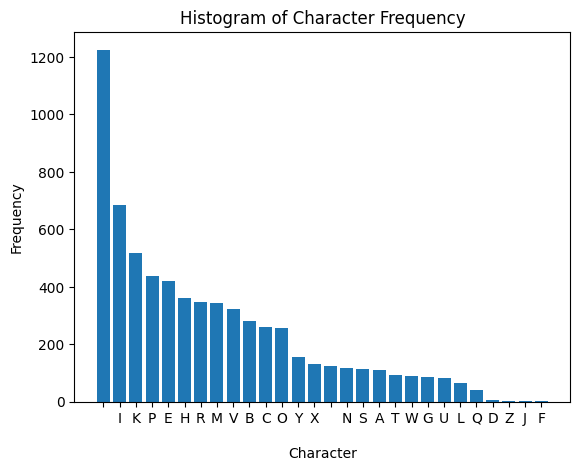

ALICE WAS BEGINNING TO GET VERY TIRED OF SITTING BY HER SISTER ON THE
BANK AND OF HAVING NOTHING TO DO ONCE OR TWICE SHE HAD PEEPED INTO THE
BOOK HER SISTER WAS READING BUT IT HAD NO PICTURES OR CONVERSATIONS IN
IT AND WHAT IS THE USE OF A BOOK THOUGHT ALICE WITHOUT PICTURES OR
CONVERSATIONS

SO SHE WAS CONSIDERING IN HER OWN MIND AS WELL AS SHE COULD FOR THE
DAY MADE HER FEEL VERY SLEEPY AND STUPID WHETHER THE PLEASURE OF
MAKING A DAISYCHAIN WOULD BE WORTH THE TROUBLE OF GETTING UP AND
PICKING THE DAISIES WHEN SUDDENLY A WHITE RABBIT WITH PINK EYES RAN
CLOSE BY HER

THERE WAS NOTHING SO VERY REMARKABLE IN THAT NOR DID ALICE THINK IT SO
VERY MUCH OUT OF THE WAY TO HEAR THE RABBIT SAY TO ITSELF OH DEAR OH
DEAR I SHALL BE TOO LATE BUT WHEN THE RABBIT ACTUALLY TOOK A WATCH
OUT OF ITS WAISTCOATPOCKET AND LOOKED AT IT AND THEN HURRIED ON ALICE
STARTED TO HER FEET FOR IT FLASHED ACROSS HER MIND THAT SHE HAD NEVER
BEFORE SEEN A RABBIT WITH EITHER A WAISTCOATPOCKET OR A WATCH TO TAKE
OUT OF IT

In [4]:
with open("./CTF/CTF-1 (Cryptanalysis)/encrypted_text.txt", "r") as file:
    # Read the entire contents of the file as binary data
    text = file.read()


original_sorted_freq = [
    "E",
    "T",
    "A",
    "O",
    "I",
    "N",
    "S",
    "H",
    "R",
    "D",
    "L",
    "C",
    "U",
    "M",
    "W",
    "F",
    "G",
    "Y",
    "P",
    "B",
    "V",
    "K",
    "X",
    "Q",
    "J",
    "Z",
]

sorted_freq = visualize_histogram(text)

## special cases \n and space
mapping = {}
for key, value in sorted_freq.items():
    if key not in [" ", "\n"]:
        mapping[key] = original_sorted_freq.pop(0)


def map_characters(text, mapping):
    result = ""
    for chr in text:
        chr = mapping[chr] if chr not in [" ", "\n", "H"] else chr
        result += chr
    return result


mapping ={
    "I": "E",
    "K": "T",
    "P": "O",
    "E": "A",
    "H": "I",
    "R": "I",
    "M": "N",
    "V": "S",
    "B": "R",
    "C": "L",
    "O": "D",
    "Y": "W",
    "X": "U",
    "N": "F",
    "S": "G",
    "A": "C",
    "T": "B",
    "W": "Y",
    "G": "P",
    "U": "M",
    "L": "K",
    "Q": "V",
    "D": "J",
    "Z": "Z",
    "J": "X",
    "F": "Q",
}
text = map_characters(text, mapping)
print(text)

### CTF – 2 (Packet Analysis)
You have been challenged by a friend to find a flag in their network packets file “packets.pcapng”, they have left the flag in there and have manipulated it to not give you an easy time, can you find out what the original text is from the packet data ?

In [5]:
## with packet analyzer GET / HTTP/1.1

# Gur synt vf cvpbPGS{c33xno00_1_f33_h_qrnqorrs}

# 39 a -> n

# The flag is picoCTF{p33kab00_1_s33_u_deadbeef}

### CTF – 3 (Image Manipulation)
You’re going through an old hard drive, you come across these 2 images “first.png” & “second.png”, can you make a flag out of them?


c:\Users\EGYPT\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


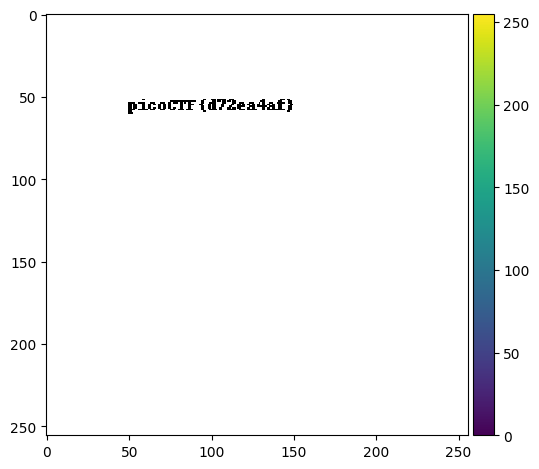

In [6]:
first_img=io.imread("../Crypto-Chatty/CTF/CTF-3 (Image Manipulation)/first.png")
second_img=io.imread("../Crypto-Chatty/CTF/CTF-3 (Image Manipulation)/second.png")

res = first_img + second_img

io.imshow(res)
io.show()

### CTF – 4 (Bit Shifting)
Find the flag in the text file “bits.txt” (Hint: When in doubt, pause and shift)

In [7]:
final_result = ""

with open("../Crypto-Chatty/CTF/CTF-4 (Bit Shifting)/bits.txt", "rb") as file:
    # Read the entire contents of the file as binary data
    binary_data = file.read()
    bits = "".join(format(byte, "08b") for byte in binary_data)

bits = bits[1:] + "0"

# Iterate over the left-shifted bit stream in steps of 8
for i in range(0, len(bits), 8):
    # Extract a group of 8 bits
    bits_group = bits[i:i+8]
    # Convert the group of 8 bits to a character
    final_result+=chr(int(bits_group, 2))

index = final_result.find("fastctf")
print(final_result[index:])

fastctf{a_bit_tricky|


### CTF – 5 (Search)
There’s a flag in the file “logs” (Hint: grep)

In [8]:
with open("../Crypto-Chatty/CTF/CTF-5 (Search)/logs", "r") as file:
    # Read the entire contents of the file as binary data
    text = file.read()   

# Pattern to search for
pattern = r'(?:CMPN|picoCTF|fastctf){[^}]+}'

# Using re.findall() to find all matches
matches = re.findall(pattern, text)

# Print the matches
for match in matches:
    print("Found match:", match)

Found match: picoCTF{grep_is_good_to_find_things_dba08a45}


### CTF – 7 (Steganography)
Steganography is to hide some file or data inside another file or data. In the given image something is HIDING.

In [9]:
# it is generated using steghide sw
# steghide extract -sf image.jpg 
with open("flag.txt", "r") as file:
    # Read the entire contents of the file as binary data
    text = file.read()   

# Pattern to search for
pattern = r'(?:CMPN|picoCTF|fastctf){[^}]+}'

# Using re.findall() to find all matches
matches = re.findall(pattern, text)

# Print the matches
for match in matches:
    print("Found match:", match)

Found match: CMPN{Spring2024}


### CTF – 8 (Can You Help Me ?)
The terrorists have caught someone in danger, can you find out where they are to help them?


In [ ]:
# this is the plain_text (using morse code from lastcall.wav)

# THE RUSSIAN TERRORISTS ARE THE ONES WHO STARTED THIS, THEY ARE THE KEY. PLEASE YOU MUST EXTRACT ME



## from  steganography  tool we extracted ciphertext and wikipeda link from the audio:

# https://en.wikipedia.org/wiki/Nihilist_cipher?keyword=polybius

# 96 57 47 66 62 38 55 67 55 35 68 44 48 95 66 65 57 65 53 75 78 77 55 36 47 55 45 66 87 34 46 48 33 77


##matrix is 
##
#  	1	2	3	4	5
# 1	p	o	l	y	b
# 2	i	u	s	a	c
# 3	d	e	f	g	h
# 4	k	m	n	q	r
# 5	t	v	w	x	z

##the key Russian
# PT=CT-KEY

# CT:  96  57   47  66  62  38  55  67  55   35  68  44  48  95  66  65   57  65  53  75  78  77  55   36  47  55  45  66  87  34  46  48  33  77
# KEY: 45  22   23  23  21  24  43  45  22   23  23  21  24  43  45  22   23  23  21  24  43  45  22   23  23  21  24  43  45  22  23  23  21  24  
# PT:  51  35   24  43  41  14  12  22  33   12  45  23  24  52  21  43   34  42  32  51  35  32  33   13  24  34  21  23  42  12  23  25  12  53


#pt: thankyouforsavingmetheflagismoscow

##thank you for saving me the flag is moscow
##flag is MOSCOW


